In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# df = pd.read_csv('accidents.csv')
# df =  df[df.City == "Chicago"] 

# df.to_csv('accidents_chicago.csv', index=False)

In [2]:
data = pd.read_csv('accidents_chicago.csv')

data = data[['ID','Severity','Start_Time','End_Time','City','State','Visibility(mi)','Sunrise_Sunset']]
weather = pd.read_csv('chicago.csv')
weather.drop(['uvIndex','uvIndex.1','humidity','precipMM', 'HeatIndexC', 'DewPointC', 'WindChillC', 'maxtempC',\
             'mintempC', 'winddirDegree'], axis=1, inplace=True)
data[['Start_Date','Start_Time']] = data.Start_Time.str.split(pat=' ',expand=True)
data[['End_Date','End_Time']] = data.End_Time.str.split(pat=' ',expand=True)

col1 = data.pop('Start_Date')
col2 = data.pop('End_Date')
data.insert(2,'Start_Date',col1)
data.insert(4,'End_Date',col2)
# data
weather = weather.rename(columns={'date_time':'Start_Date'}, inplace=False)

data = pd.merge(data, weather, on='Start_Date')
data

,ID,Severity,Start_Date,Start_Time,End_Date,End_Time,City,State,Visibility(mi),Sunrise_Sunset,...,moonset,sunrise,sunset,FeelsLikeC,WindGustKmph,cloudcover,pressure,tempC,visibility,windspeedKmph
0,A-31622,3,2016-11-30,16:33:05,2016-11-30,22:33:05,Chicago,IL,10.0,Night,...,06:39 PM,07:58 AM,05:21 PM,0,28,44,1004,7,9,20
1,A-31694,3,2016-11-30,19:26:19,2016-12-01,01:26:19,Chicago,IL,10.0,Night,...,06:39 PM,07:58 AM,05:21 PM,0,28,44,1004,7,9,20
2,A-58802,3,2016-11-30,03:45:07,2016-11-30,09:45:07,Chicago,IL,10.0,Night,...,06:39 PM,07:58 AM,05:21 PM,0,28,44,1004,7,9,20
3,A-58865,2,2016-11-30,06:27:36,2016-11-30,12:27:36,Chicago,IL,10.0,Night,...,06:39 PM,07:58 AM,05:21 PM,0,28,44,1004,7,9,20
4,A-58879,2,2016-11-30,06:50:15,2016-11-30,12:50:15,Chicago,IL,10.0,Night,...,06:39 PM,07:58 AM,05:21 PM,0,28,44,1004,7,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9030,A-2845042,3,2019-08-23,16:58:31,2019-08-23,17:26:11,Chicago,IL,10.0,Day,...,01:50 PM,06:07 AM,07:39 PM,21,23,7,1021,22,10,18
9031,A-2845043,3,2019-08-23,16:03:57,2019-08-23,16:33:31,Chicago,IL,10.0,Day,...,01:50 PM,06:07 AM,07:39 PM,21,23,7,1021,22,10,18
9032,A-2845044,3,2019-08-23,16:03:57,2019-08-23,16:33:31,Chicago,IL,10.0,Day,...,01:50 PM,06:07 AM,07:39 PM,21,23,7,1021,22,10,18
9033,A-2845045,3,2019-08-23,16:03:57,2019-08-23,16:33:31,Chicago,IL,10.0,Day,...,01:50 PM,06:07 AM,07:39 PM,21,23,7,1021,22,10,18


,count,mean,std,min,25%,50%,75%,max
Severity,9035.0,2.675927,0.598788,2.0,2.0,3.0,3.0,4.0
Visibility(mi),9025.0,8.979579,2.396312,0.0,10.0,10.0,10.0,20.0
totalSnow_cm,9035.0,0.108633,0.714154,0.0,0.0,0.0,0.0,14.4
sunHour,9035.0,9.528622,3.343500,3.4,7.0,9.4,11.6,14.5
moon_illumination,9035.0,46.417820,31.315670,0.0,19.0,46.0,74.0,100.0
FeelsLikeC,9035.0,7.967128,13.759933,-40.0,-2.0,8.0,20.0,34.0
WindGustKmph,9035.0,25.635529,9.778094,6.0,18.0,25.0,32.0,64.0
cloudcover,9035.0,45.269286,29.414382,0.0,19.0,41.0,69.0,100.0
pressure,9035.0,1017.576093,7.555978,997.0,1013.0,1017.0,1022.0,1042.0
tempC,9035.0,12.424682,11.174059,-25.0,4.0,12.0,23.0,34.0


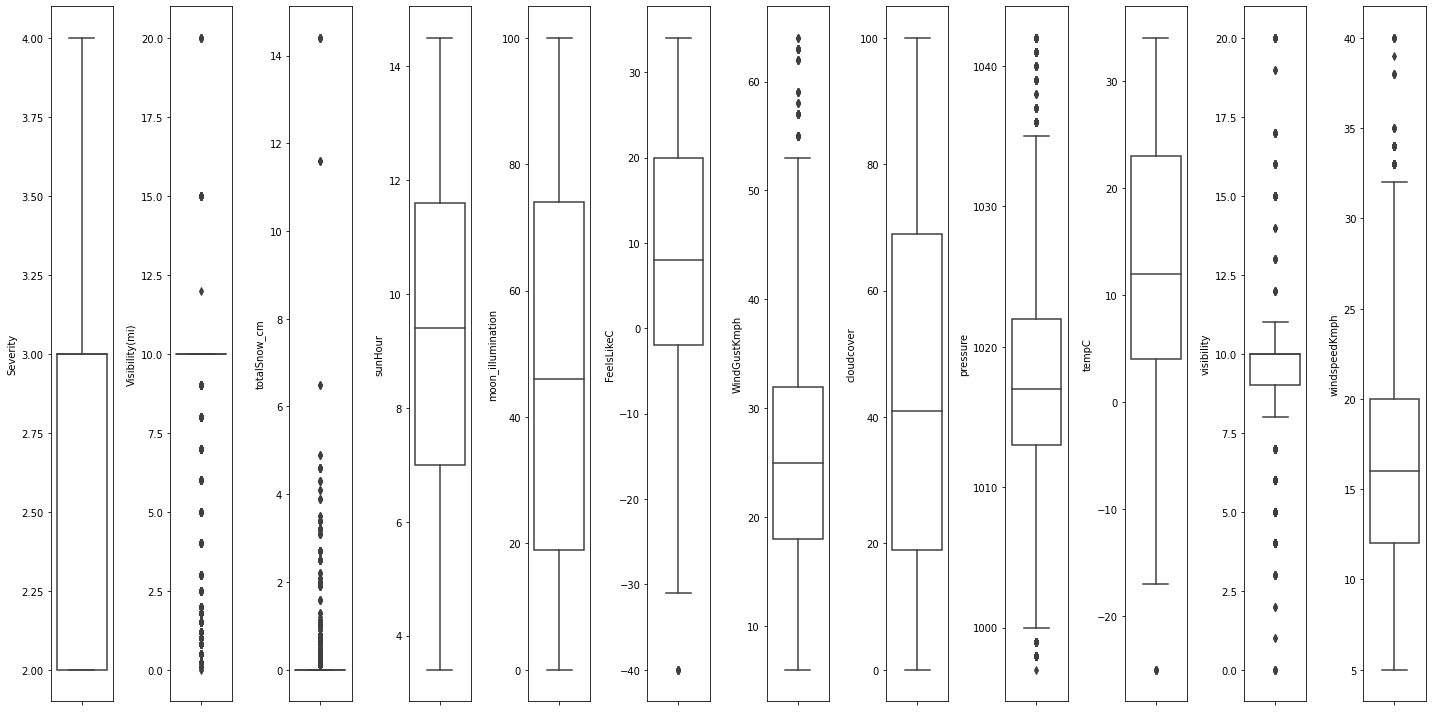

In [3]:
df = data

# opis poszczególnych danych i zaprezentowanie ich rozłożenia na podstawie wykresów pudełkowych
display(df.describe().T)
columns = df.select_dtypes(include=np.number).columns
figure = plt.figure(figsize=(20, 10))
figure.add_subplot(1, len(columns), 1)
for index, col in enumerate(columns):
    if index > 0:
        figure.add_subplot(1, len(columns), index + 1)
    sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
figure.tight_layout()
plt.show()


In [4]:
df = data
print(df.select_dtypes(include=['object', 'category']).nunique())

#zliczanie top 5 najczęściej występujących wartości
columns = df.select_dtypes(include=['object', 'category']).columns
for col in columns:
    print("Top 5 unique values of " + col)
    print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
          :min(5, len(df[col].value_counts()))])
    print(" ")
    
# zliczanie unikalnych danych
for col in df.select_dtypes(include='category').columns:
    fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
    fig.set_xticklabels(rotation=90)
    plt.show()

ID                8886
Start_Date        1198
Start_Time        7777
End_Date          1207
End_Time          7803
City                 1
State                1
Sunrise_Sunset       2
moonrise           793
moonset            822
sunrise            184
sunset             191
dtype: int64
Top 5 unique values of ID
          ID  Count
0  A-2371915      2
1  A-2369234      2
2  A-2362927      2
3  A-2362928      2
4  A-2364856      2
 
Top 5 unique values of Start_Date
   Start_Date  Count
0  2019-12-31     36
1  2016-12-19     35
2  2017-03-14     34
3  2017-11-10     32
4  2019-01-25     28
 
Top 5 unique values of Start_Time
  Start_Time  Count
0   04:33:04      9
1   18:59:16      8
2   23:37:55      6
3   23:58:17      6
4   18:14:02      6
 
Top 5 unique values of End_Date
     End_Date  Count
0  2017-03-14     41
1  2017-11-10     33
2  2016-12-12     27
3  2019-01-25     27
4  2016-12-19     26
 
Top 5 unique values of End_Time
   End_Time  Count
0  00:59:16      6
1  00:27:03    

,pressure
Severity,
2,1017.904722
3,1017.289251
4,1017.926984


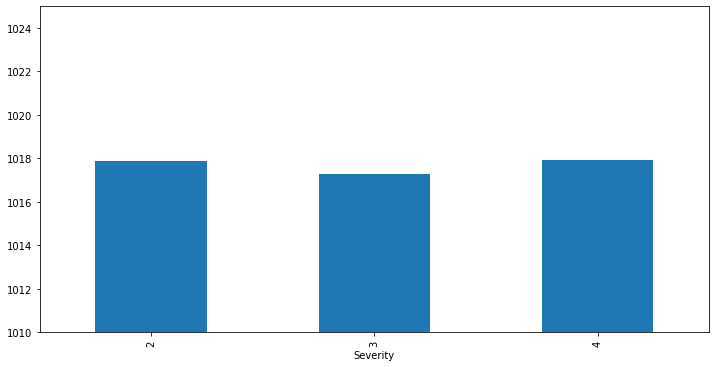

In [5]:
d1 = data.groupby(['Severity'])['pressure'].mean()
result = pd.DataFrame(d1)
d1.plot(x='Severity',y='pressure',kind='bar',figsize=(12,6), ylim = (1010,1025))
result

,ID,Visibility(mi)
1008,A-60892,7.0
2921,A-180914,10.0
581,A-48434,10.0
7712,A-2746358,10.0
3476,A-2373308,10.0
3477,A-2373308,10.0
8171,A-2778193,1.0
8902,A-2832227,10.0


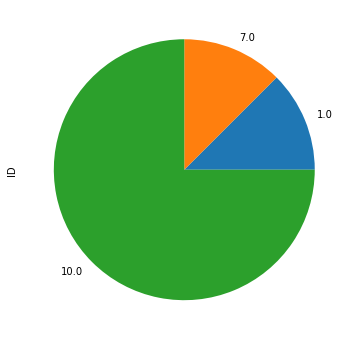

In [6]:
# Wszystkie wypadki trwające dłużej niż jeden dzień i jaka była widoczność podczas nich
data[['Start_Date','End_Date']] = data[['Start_Date','End_Date']].apply(pd.to_datetime)
data['diff_days'] = data['End_Date'] - data['Start_Date']
data['diff_days'] = data['diff_days'] / np.timedelta64(1,'D')
d2 = data[data['diff_days'] > 1.0].sort_values(by = ['diff_days'], ascending = False)[['ID','Visibility(mi)']]
result2 = pd.DataFrame(d2)
chart = d2.groupby(['Visibility(mi)'])['ID'].count()
chart.plot(kind='pie',figsize=(12,6))
result2

Count
Sunrise_Sunset Severity       
Day            2          2735
               3          2106
               4           237
Night          2           823
               3          2741
               4           393

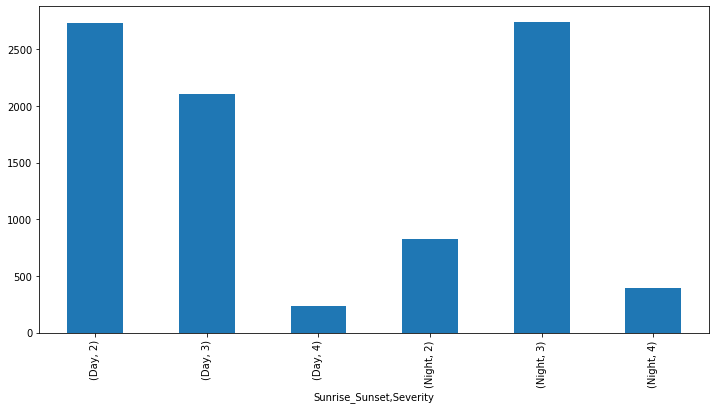

In [7]:
# Ilość wypadków danego poziomu zniszczenia z podziałem na dzień i noc
d2 = data.groupby(['Sunrise_Sunset','Severity'])['ID'].count()
result3 = pd.DataFrame(d2).rename(columns={'ID' : 'Count'})
d2.plot(kind='bar', x=['Sunrise_Sunset','Severity'], y='Count', figsize=(12,6))
result3

,%_wypadkow,%_wea
tempC,,
-25,0.12,0.08
-15,1.43,0.76
-10,2.03,1.59
-5,5.69,4.61
0,11.99,12.16
5,15.65,16.24
10,14.24,13.52
15,8.66,8.91
20,14.41,14.50


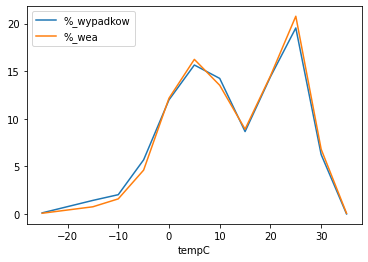

In [8]:
# Zbadaj wpływ temeperatury na ilość wypadków.

# obliczenie ile było wypadków przy danej temperaturze
data['tempC'] = pd.to_numeric(data['tempC'])

temps = data["tempC"]
temps = pd.DataFrame(temps)

temps["tempC"] = [5*round(d/5) for d in temps["tempC"]]

temps['ilosc'] = temps["tempC"]
temps = temps.groupby("tempC").count()
temps_sum = temps["ilosc"].sum()
temps["%_wypadkow"] = [round(100 * d/temps_sum, 2) for d in temps["ilosc"]]
# temps

# dostosowanie typów danych
min_data = data['Start_Date'].sort_values().head(1).drop_duplicates()
max_data = data['Start_Date'].sort_values(ascending=False).head(1).drop_duplicates()


min_data = pd.DataFrame(min_data)
max_data = pd.DataFrame(max_data)
min_data = min_data.iloc[0]['Start_Date']
max_data = max_data.iloc[0]['Start_Date']
weather['Start_Date'] = weather['Start_Date'].apply(pd.to_datetime)
weather.dtypes
weather_interval = weather[weather['Start_Date'].between(min_data, max_data)].copy()

# obliczenie ile razy występowała dana temperatura w danym okresie (liczona raz na dzień)
weather_interval["tempC"] = pd.to_numeric(weather_interval["tempC"])

temps_wea = weather_interval["tempC"]
temps_wea = pd.DataFrame(temps_wea)

temps_wea["tempC"] = pd.to_numeric(temps_wea["tempC"])

temps_wea["tempC"] = [5*round(d/5) for d in temps_wea["tempC"]]

temps_wea['ilosc_wea'] = temps_wea["tempC"]
temps_wea = temps_wea.groupby("tempC").count()
temps_wea_sum = temps_wea["ilosc_wea"].sum()
temps_wea["%_wea"] = [round(100 * d/temps_wea_sum, 2) for d in temps_wea["ilosc_wea"]]
# temps_wea

# zestawienei procentowego występowania danej temperatury względem wypadków i poszczególnych dni
temps_comp = pd.merge(temps, temps_wea, on='tempC')

column_to_move = temps_comp.pop("ilosc_wea")
column_to_move = temps_comp.pop("ilosc")

temps_comp.plot.line()

temps_comp

%_gusts_wea
WindGustKmph season             
5            Summer         4.33
             Winter         2.00
10           Autumn         4.10
             Spring         3.85
             Summer         2.51
             Winter         2.87
15           Autumn         2.94
             Spring         3.60
             Summer         2.35
             Winter         2.05
20           Autumn         2.27
             Spring         1.77
             Summer         2.06
             Winter         2.17
25           Autumn         2.26
             Spring         1.55
             Summer         1.96
             Winter         2.60
30           Autumn         2.02
             Spring         2.29
             Summer         2.03
             Winter         2.31
35           Autumn         2.35
             Spring         1.53
             Summer         1.80
             Winter         2.33
40           Autumn         1.52
             Spring         1.42
             Summer         0.93
             Winter         1.48
45           Autumn         1.77
             Spring         1.58
             Summer         0.78
             Winter         1.48
50           Autumn         1.22
             Spring         2.57
             Summer         2.29
             Winter         2.17
55           Autumn         3.38
             Spring         1.52
60           Spring         2.22
             Winter         1.17
65           Spring         2.80
             Winter         2.20

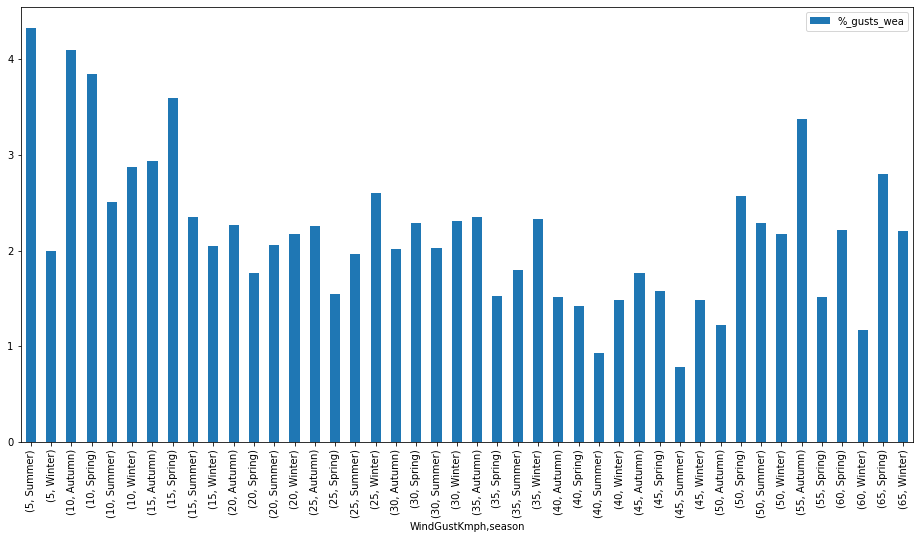

In [9]:
# 2. Wpływ wiatru na liczbę wypadków w poszczególnych porach roku

seasons = data[['Start_Date', 'WindGustKmph', 'windspeedKmph']]
seasons = pd.DataFrame(seasons)
seasons['Start_Date'] = pd.to_datetime(seasons['Start_Date'])
seasons["month"] = seasons['Start_Date'].dt.month
months = [d + 1 for d in range(12)]
months = pd.DataFrame(months, columns=["month"])

season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Autumn',
               10: 'Autumn',
               11: 'Autumn',
               12: 'Winter'}

months['season'] = months['month'].apply(lambda x: season_dict[x])
months
seasons = pd.merge(seasons, months, on='month')
seasons = seasons[["WindGustKmph", "season"]]
seasons["WindGustKmph"] = pd.to_numeric(seasons["WindGustKmph"])
seasons["WindGustKmph"] = [5*round(d/5) for d in seasons["WindGustKmph"]]
seasons["gustsNum"] = seasons["WindGustKmph"]
seasons = seasons.groupby(["WindGustKmph", "season"]).count()

seasons_wea = weather[["Start_Date","WindGustKmph"]]
seasons_wea = pd.DataFrame(seasons_wea)
seasons_wea["Start_Date"] = pd.to_datetime(seasons_wea["Start_Date"])
seasons_wea["WindGustKmph"] = pd.to_numeric(seasons_wea["WindGustKmph"])

seasons_wea["month"] = seasons_wea['Start_Date'].dt.month
seasons_wea["season"] = seasons_wea['month'].apply(lambda x: season_dict[x])

seasons_wea = seasons_wea[["WindGustKmph", "season"]]
seasons_wea["WindGustKmph"] = [5*round(d/5) for d in seasons_wea["WindGustKmph"]]
seasons_wea["gusts_weaNum"] = seasons_wea["WindGustKmph"]

seasons_wea = seasons_wea.groupby(["WindGustKmph", "season"]).count()
seasons_wea = pd.merge(seasons_wea, seasons, on=['WindGustKmph', 'season'])
gusts_wea_sum = seasons_wea["gusts_weaNum"].sum()
gusts_sum = seasons_wea["gustsNum"].sum()

# seasons_wea["%_gusts_wea"] = [round(100 * d/gusts_wea_sum, 2) for d in seasons_wea["gusts_weaNum"]]
# seasons_wea["%_gusts"] = [round(100 * d/gusts_sum, 2) for d in seasons_wea["gustsNum"]]

seasons_wea["%_gusts_wea"] = round(seasons_wea["gustsNum"]/seasons_wea["gusts_weaNum"], 2)

seasons_wea.pop("gustsNum")
seasons_wea.pop("gusts_weaNum")

plt.rcParams["figure.figsize"] = (16,8)
seasons_wea.plot.bar()

seasons_wea

In [10]:
cam_data = pd.read_csv('red-light-camera-violations.csv')

cam_data = cam_data[["CAMERA ID", "VIOLATION DATE", "VIOLATIONS"]]
cam_data.columns = ["Camera_ID", "Start_Date", "Violations"]

cam_data = cam_data.groupby("Start_Date")["Violations"].sum().reset_index()

cam_data = pd.DataFrame(cam_data)
# cam_data[['Start_Date','Start_Time']] = cam_data.Start_Date.str.split(pat=' ',expand=True)
cam_data["Start_Date"] = pd.to_datetime(cam_data["Start_Date"])
cam_data["Start_Date"] = [d.date() for d in cam_data["Start_Date"]]
cam_data["Start_Date"] = pd.to_datetime(cam_data["Start_Date"])

cam_data = pd.merge(data, cam_data, on="Start_Date")
cam_data

,ID,Severity,Start_Date,Start_Time,End_Date,End_Time,City,State,Visibility(mi),Sunrise_Sunset,...,sunset,FeelsLikeC,WindGustKmph,cloudcover,pressure,tempC,visibility,windspeedKmph,diff_days,Violations
0,A-31622,3,2016-11-30,16:33:05,2016-11-30,22:33:05,Chicago,IL,10.0,Night,...,05:21 PM,0,28,44,1004,7,9,20,0.0,1575
1,A-31694,3,2016-11-30,19:26:19,2016-12-01,01:26:19,Chicago,IL,10.0,Night,...,05:21 PM,0,28,44,1004,7,9,20,1.0,1575
2,A-58802,3,2016-11-30,03:45:07,2016-11-30,09:45:07,Chicago,IL,10.0,Night,...,05:21 PM,0,28,44,1004,7,9,20,0.0,1575
3,A-58865,2,2016-11-30,06:27:36,2016-11-30,12:27:36,Chicago,IL,10.0,Night,...,05:21 PM,0,28,44,1004,7,9,20,0.0,1575
4,A-58879,2,2016-11-30,06:50:15,2016-11-30,12:50:15,Chicago,IL,10.0,Night,...,05:21 PM,0,28,44,1004,7,9,20,0.0,1575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8732,A-2845042,3,2019-08-23,16:58:31,2019-08-23,17:26:11,Chicago,IL,10.0,Day,...,07:39 PM,21,23,7,1021,22,10,18,0.0,1882
8733,A-2845043,3,2019-08-23,16:03:57,2019-08-23,16:33:31,Chicago,IL,10.0,Day,...,07:39 PM,21,23,7,1021,22,10,18,0.0,1882
8734,A-2845044,3,2019-08-23,16:03:57,2019-08-23,16:33:31,Chicago,IL,10.0,Day,...,07:39 PM,21,23,7,1021,22,10,18,0.0,1882
8735,A-2845045,3,2019-08-23,16:03:57,2019-08-23,16:33:31,Chicago,IL,10.0,Day,...,07:39 PM,21,23,7,1021,22,10,18,0.0,1882


,count,Violations
season,,
Autumn,28.0,27.0
Spring,23.0,22.0
Summer,26.0,33.0
Winter,23.0,18.0


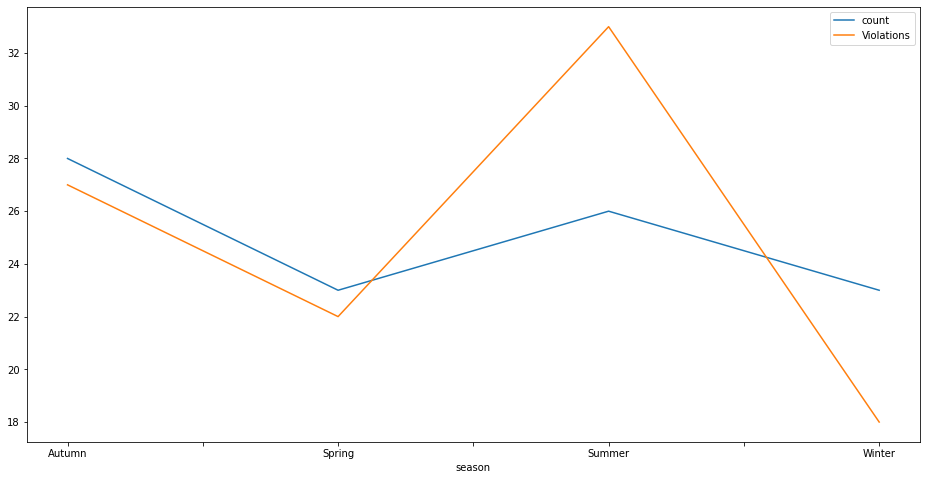

In [11]:
# relacja między liczbą wypadków, a liczbą przestępstw w danej porze roku

dates = cam_data[["Start_Date", "Violations"]].drop_duplicates("Start_Date")

# dates = pd.DataFrame(dates).reset_index()
# dates = dates["Start_Date"]
# dates = pd.DataFrame(dates)

dates["month"] = dates["Start_Date"].dt.month
dates = pd.merge(dates, months, on='month')

count_acc = cam_data.groupby("Start_Date")["ID"].count()
count_acc = pd.DataFrame(count_acc).reset_index()

dates = pd.merge(dates, count_acc, on="Start_Date").rename(columns={"ID": "count"})
dates = dates.groupby("season")[["count","Violations"]].sum()

sum_count = dates["count"].sum()
sum_Violations = dates["Violations"].sum()

dates["count"] = round(100 * dates["count"]/sum_count)
dates["Violations"] = round(100 * dates["Violations"]/sum_Violations)

dates.plot.line()
dates
# dates
# months
# dates["accidents_number"] 